<img src = img/womenMSEngineering.PNG width = 100, align = left><h1 align=left><font size = 6>Karen McEwen</font></h1>

# IBM/Coursera Data Science Certificate Capstone Project 
## Work Spaces for Freelancers and Entrepreneurs in Cuyahoga County (NE Ohio, USA)

## Project Questions and Assumptions
As more and more people are working from home, this project looks at places that a freelance professional or entrepreneur could work, if they chose not to work at home.  The professional is assumed to be seeking a reasonably inexpensive space on a daily basis, a wi-fi connection, and (possibly) coffee.  This project is not intended for professionals looking for commercial space, nor professionals who require specialized equipment.  

Said Neil Weakland who started Canton Workspace:
"About a year and a half ago I was in the job market looking for a new job and I couldn’t do that from my house because I have small children. So I went looking for a place outside my house where I could sit down and look for work and things like that, and I found that there really wasn’t a good place to do that in Canton. There are coffee shops, there are libraries, but at all of those places you can’t leave your belongings and leave and come back, and phone calls aren’t really a good for that situation either. So I went looking for a coworking space and found out that Canton didn’t have one." - source: jumpstartinc.org 

Specifically, this report looks at coworking spaces, cafes, coffee shops, tea rooms, and libraries in the region as potential work spaces for the individual.

The region that is considered is Cuyahoga County, in Northeastern Ohio, of which Cleveland, Ohio is the primary city.  The location data comes from zip codes in the county and neighborhoods in Cleveland. 

The question asked, is which areas are the best for freelancers to find space to work?  Conversely, if one were to start a dedicated coworking space, where would one like to locate it?

Note, that this study began and the data was collected prior to Coronavirus restrictions that were put in place in Ohio. In lieu of any information, it is presumed that once restrictions are lifted all of these locations will reopen.

See the report for more details.

In [2]:
#import necessary libraries
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# import k-means from clustering stage
from sklearn.cluster import KMeans

# uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge folium=0.5.0 --yes 

# map rendering library
import folium 

from IPython.display import display, Image

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### Upload zip code data for Cuyahoga County

In [3]:
# upload the zip code file for Cuyahoga County into a new dataframe
cuy_df = pd.read_csv('Cuyahoga_zip_lat_long.csv')
print('file uploaded')

file uploaded


In [4]:
#set to display all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cuy_df.head()

,Zip,City,State,Latitude,Longitude
0,44141,Brecksville,OH,41.307688,-81.61835
1,44136,Strongsville,OH,41.312752,-81.83197
2,44133,North Royalton,OH,41.313758,-81.74204
3,44147,Broadview Heights,OH,41.321827,-81.67659
4,44017,Berea,OH,41.369950,-81.86259


In [5]:
cuy_df.describe(include='all')

,Zip,City,State,Latitude,Longitude
count,70.000000,70,70,70.000000,70.000000
unique,NaN,21,1,NaN,NaN
top,NaN,Cleveland,OH,NaN,NaN
freq,NaN,47,70,NaN,NaN
mean,44134.228571,NaN,NaN,41.466691,-81.660567
std,41.604825,NaN,NaN,0.064993,0.126560
min,44017.000000,NaN,NaN,41.307688,-81.928650
25%,44113.250000,NaN,NaN,41.433366,-81.704657
50%,44130.500000,NaN,NaN,41.487344,-81.680000
75%,44169.500000,NaN,NaN,41.490000,-81.577213


## Basic Information on Cuyahoga County

There are 70 zip codes in Cuyahoga County, with 21 unique municipalities.  Cleveland is the primary city, with 46 zip codes.  Looking closely at the data, we see that 17 of these zip codes are 'located' in the same spot, which is probably the central post office facility for the downtown Cleveland area. Further research discerns that some companies have their own zip codes. Since these zip codes do not give us helpful information, the duplicate locations will be removed from the dataframe.

In [6]:
# dropping ALL duplicte values 
cuy_df.drop_duplicates(subset ="Latitude", 
                     keep = 'first', inplace = True) 
  
cuy_df.shape

(53, 5)

### Map of Cuyahoga County

In [7]:
## First Map of Cuyahoga County using mean of data for latitude and longitude
mean_lat = cuy_df.loc[:,'Latitude'].mean()
mean_long = cuy_df.loc[:,'Longitude'].mean()
print('mean latitude is {}\n mean longitude is {}'.format(mean_lat, mean_long))

mean latitude is 41.459215056603774
 mean longitude is -81.6543335471698


In [8]:
# create a map using folium
map_cuyahoga = folium.Map(location=[mean_lat, mean_long], zoom_start=10)
map_cuyahoga

# Neighborhoods within Cleveland City

According to the website at Cleveland Live, Cleveland is composed of 26 
distinct neighborhoods.  By pulling up the information from each one, and choosing a location at or near the center of each neighborhood, I was able to get the latitude and longitude from Google Maps

In [9]:
# upload the neighborhood file for Cuyahoga County into a new dataframe
cle_neigh_df = pd.read_csv('Cleve-Neigh.csv')
cle_neigh_df.head()

,Neighborhoods,Latitude,Longitude
0,Brooklyn Centre,41.454216,-81.701580
1,Buckeye-Woodhill,41.484417,-81.604898
2,Central / Kinsman,41.487841,-81.650698
3,Clark-Fulton,41.467813,-81.713285
4,Collinwood,41.562977,-81.575704


In [10]:
cle_neigh_df.describe(include='all')

,Neighborhoods,Latitude,Longitude
count,26,26.000000,26.000000
unique,26,NaN,NaN
top,Downtown CLE,NaN,NaN
freq,1,NaN,NaN
mean,NaN,41.482339,-81.662463
std,NaN,0.028478,0.066324
min,NaN,41.438351,-81.817200
25%,NaN,41.458126,-81.710268
50%,NaN,41.484081,-81.644486
75%,NaN,41.498430,-81.610841


There are 26 distinct neighborhoods in the city of Cleveland. 

## Combining Location Data
Create a single dataframe with both the zipcodes and the neighborhoods on it and create a map

In [11]:
cle_neigh_df2 = cle_neigh_df.rename(columns = {'Neighborhoods':'Location_Name'})

In [12]:
# change zip code from numeric to string value
cuy_df['Zip'] = cuy_df['Zip'].astype(str)

In [13]:
# create a new column combining name of city and zip code
cuy_df['Location_Name'] = cuy_df['City']+'_'+cuy_df['Zip']

In [14]:
#create a new dataframe with the new name, lat and long
cuy_df2 = cuy_df.loc[:,['Location_Name','Latitude','Longitude']]

In [15]:
# combine cuy_df2 and cle_neigh_df
frames = [cuy_df2,cle_neigh_df2]
cuy_df_all = pd.concat(frames, axis=0, ignore_index=True, sort=False)
cuy_df_all.head()

,Location_Name,Latitude,Longitude
0,Brecksville_44141,41.307688,-81.61835
1,Strongsville_44136,41.312752,-81.83197
2,North Royalton_44133,41.313758,-81.74204
3,Broadview Heights_44147,41.321827,-81.67659
4,Berea_44017,41.369950,-81.86259


In [17]:
cuy_df_all.shape

(79, 3)

In [20]:
# save dataframe as cuy_all_lat_lng.csv
cuy_df_all.to_csv('cuy_all_lat_lng.csv')

## Create a map using Folium

In [18]:
map_cuyahoga = folium.Map(location=[mean_lat, mean_long], zoom_start=10)

#add markers to map to indicate the locations of all neighborhoods and zip codes

for lat, lng, place in zip(cuy_df_all['Latitude'], cuy_df_all['Longitude'], cuy_df_all['Location_Name']):
    # popup label
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    
    # folium.Circle has radius in meters
    # folium.CircleMarker has radius in pixels
    folium.Circle(
        [lat,lng],
        radius = 1000, # meters 1000 meters = 0.6 miles
        popup = label,
        color = 'orange',
        fill = True,
        fill_color = 'brown',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_cuyahoga)
   
map_cuyahoga

### First Look at Cuyahoga Map
How large should the radius of our search be using the available location data?  Using a one mile radius (approximately 1600 m) covers the area, but there is a lot of overlap.  One-half mile (appx. 800 m) doesn't quite cover enough of the area.  So we will use 1000 m (approximately 0.6 miles) to get the best coverage with the least amount of overlap.

## Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = '45DHAMVVN3GXOW1HKEJAGPU1EYEVLWI2QO2HYJZ2ZWAQLG0B' # your Foursquare ID
CLIENT_SECRET = 'RD45MBHGBIYOSWK0C140EUFA4GIHMN5E10OPCOOV1DU2NWKW' # your Foursquare Secret
VERSION = '20200131' # Foursquare API version


In [20]:
# From the Foursquare lab - the user_agent name is one we choose
# start with Cleveland City Hall - 601 Lakeside Ave E, Cleveland, OH 44114 - 41.5052° N, 81.6937° W
address = '601 Lakeside Ave E, Cleveland, OH 44114'

geolocator = Nominatim(user_agent="foursquare_cuyahoga_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Latitude and longitude of the Cleveland City Hall are: ',latitude, longitude)

Latitude and longitude of the Cleveland City Hall are:  41.505106749999996 -81.69365264998854


## Foursquare Category Names and IDs
These are the categories that we are interested in for this project: \
Café - 4bf58dd8d48988d16d941735 \
Coffee Shop - 4bf58dd8d48988d1e0931735 \
Library - 4bf58dd8d48988d12f941735 \
Coworking Space - 4bf58dd8d48988d174941735 
Tea Room - 4bf58dd8d48988d1dc931735

# Coworking Spaces in Cuyahoga County
These data were collected based on Google searches and advertisements for coworking spaces in the County.  Data includes the location, latitude and longitude, website, and how much a day pass costs.  My project presumes a single entrepreneur or freelancer looking for a place to work on a daily basis that is equivalent to a coffee shop or other transient space. From my research, there were 22 coworking spaces in Cuyahoga County that offered day passes and met the other criteria.

This project does not look at space that is only available on a commercial level. Nor does it look at spaces that are targeted to specific occupations such as law or creative arts that require specialized equipment.

In [21]:
coworking_df = pd.read_csv('Coworking_Spaces_Cuy.csv')
coworking_df.head()

,Name,Street,City,ZipCode,Latitude,Longitude,Neighborhood,Neigh Latitude,Neigh Longitude,categories,Phone,Website,DayPass
0,Beauty Shoppe/Seymore Building,2529 Detroit Ave,Cleveland,44113,41.49087,-81.70803,Ohio City,41.484194,-81.711294,coworking,(888)230-6460,https://beautyshoppe.co/locations/seymour-buil...,20
1,CLEworx,1400 E 105th St suite B,Cleveland,44106,41.51847,-81.61552,Cleveland_44106,41.507751,-81.608830,coworking,(216) 658-6846,https://www.cleworx.com/,10
2,CoLab Lakewood,17008 Madison Avenue,Lakewood,44107,41.47691,-81.76880,Westown,41.465800,-81.769067,coworking,(216) 233-5161,colablkwd.com,17
3,CUBE Cleveland Heights,2460 Fairmount Blvd #202,Cleveland Heights,44106,41.50017,-81.59237,Cleveland_44106,41.507751,-81.608830,coworking,(216) 245-9629,https://www.cubecleveland.com/getsomeworkdone....,50
4,CUBE Solon,6240 Som Center #130,Solon,44139,41.38964,-81.43865,Solon_44139,41.388387,-81.443650,coworking,(216) 245-9629,https://www.cubecleveland.com/getsomeworkdone....,50


In [22]:
coworking_df.describe(include = 'all')

,Name,Street,City,ZipCode,Latitude,Longitude,Neighborhood,Neigh Latitude,Neigh Longitude,categories,Phone,Website,DayPass
count,22,22,22,22.000000,22.000000,22.000000,22,22.000000,22.000000,22,22,22,22.000000
unique,22,22,11,NaN,NaN,NaN,13,NaN,NaN,1,14,14,NaN
top,SAIL Loft,6100 Oak Tree Blvd. Suite 200,Cleveland,NaN,NaN,NaN,Downtown CLE,NaN,NaN,coworking,(855) 400-3575,www.regus.com,NaN
freq,1,1,10,NaN,NaN,NaN,5,NaN,NaN,22,5,5,NaN
mean,NaN,NaN,NaN,44117.636364,41.485114,-81.643643,NaN,41.485948,-81.656908,NaN,NaN,NaN,22.863636
std,NaN,NaN,NaN,12.093073,0.050308,0.143123,NaN,0.040340,0.115429,NaN,NaN,NaN,15.541942
min,NaN,NaN,NaN,44103.000000,41.362540,-81.950950,NaN,41.388387,-81.928650,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,44108.500000,41.475867,-81.704525,NaN,41.472881,-81.706881,NaN,NaN,NaN,12.250000
50%,NaN,NaN,NaN,44113.500000,41.498565,-81.673627,NaN,41.491928,-81.675900,NaN,NaN,NaN,15.000000
75%,NaN,NaN,NaN,44122.000000,41.503513,-81.572135,NaN,41.502816,-81.588790,NaN,NaN,NaN,23.750000


# Notes on Coworking Space Data

As of March 1, 2020, there were 22 coworking spaces easily accessible on a daily basis to an individual freelancer or entrepreneur in Cuyahoga county. The cost for a daily pass comes from the website, a phone call to the location.  At the time that this project was started and the data collected, there were no Coronavirus restrictions in place.  At the time of the project completion, all libraries were closed, cafes and coffee shops restricted to take-out, and co-working spaces closed to all but long-term renters.  In absence of information to the contrary, it is assumed that all of these locations will be open and operating at some point after restrictions are lifted.

From the data above, we can see that there are 11 unique municipalities represented here, with Cleveland being the primary location.  Costs for day passes range from 10-25 dollars, with a mean of 22.86 dollars.

In [23]:
# function that extracts the category of the venue - from the Foursquare Lab
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Foursquare category "Coworking Spaces"
Let's look at Foursquare veunes labeled 'Coworking spaces' in the region.  Are they relevant to this particular project?

In [29]:
# GET request - Coworking spaces

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
QUERY = 'Coworking Space'
url_cospace = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Down_CLE_Lat, 
    Down_CLE_Long,
    QUERY,
    radius, 
    LIMIT)

# Send the GET request and examine the results
results_cospace = requests.get(url_cospace).json()


In [32]:
venues_cospace = results_cospace['response']['groups'][0]['items']
    
nearby_venues_cospace = json_normalize(venues_cospace) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_cospace =nearby_venues_cospace.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_cospace['venue.categories'] = nearby_venues_cospace.apply(get_category_type, axis=1)

# clean columns
nearby_venues_cospace.columns = [col.split(".")[-1] for col in nearby_venues_cospace.columns]

nearby_venues_cospace

,name,categories,lat,lng
0,Cowork Tremont,Coworking Space,41.499289,-81.695237
1,City Year - Cleveland,Coworking Space,41.501061,-81.690731
2,Patituce & Associates,Coworking Space,41.501513,-81.689209
3,Roman Catholic Diocese of Cleveland,Coworking Space,41.502943,-81.689157
4,Smart Shape Design,Coworking Space,41.504979,-81.686411
5,Center For Health Affairs,Coworking Space,41.500233,-81.682276
6,OnShift,Coworking Space,41.500835,-81.680753
7,StartMart,Coworking Space,41.497726,-81.693882
8,"Regus - Ohio, Cleveland - Cleveland City Center",Coworking Space,41.501327,-81.689589
9,Beauty Shoppe,Coworking Space,41.490989,-81.707760


### Foursquare "Coworking Space" Data - Why I am not using it...
While Foursquare has a category labelled 'Coworking Space', reviewing the results an area within 5000 meters of the Downtown Cleveland area reveals 22 of the 26 venues are available only as commercial rentals, or are other types of businesses (like a law office or creative arts space) that are not what I am searching for in this project.  Because the intent of the project is to look for spaces for a freelance or entrepreneur individual who requires only a computer and internet connection (and, of course, coffee), I am going to disregard this category from Foursquare, and use the data that I collected initially for coworking spaces in Cuyahoga County.

## Create a map of Cuyahoga County with regions and coworking spaces

In [30]:
# create folium map of Cuyahoga County centered on the mean latitude and longitude

map_cuy_zip = folium.Map(location=[mean_lat, mean_long], zoom_start=10)

# add markers to map to show the cities/zip codes
for lat, lng, place in zip(cuy_df_all['Latitude'], cuy_df_all['Longitude'], cuy_df_all['Location_Name']):
    # popup label
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    
    # circle markers (radius is in meters)
    folium.Circle(
        [lat,lng],
        radius = 2000,
        popup = label,
        color = 'orange',
        fill = True,
        fill_color = 'brown',
        fill_opacity = 0.5,
        parse_html = False).add_to(map_cuy_zip)
   
# add markers to map to show the coworking spaces
for lat, lng, place in zip(coworking_df['Latitude'], coworking_df['Longitude'], coworking_df['Name']):
    # popup label
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    
    # circle markers
    folium.Circle(
        [lat,lng],
        radius = 25,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.8,
        parse_html = False).add_to(map_cuy_zip)
map_cuy_zip

From the interactive map, it is clear that the Downtown Cleveland neighborhood has the most co-working spaces, followed by the MidTown neighborhood.  The remainder of the coworking spaces are scattered around the map.  

In [31]:
# pull the coworking spaces into a pandas dataframe
# want name, category, latitude and longitude
# coworking_df.columns
cowork_df = coworking_df[['Name', 'Neighborhood', 'Neigh Latitude', 'Neigh Longitude', 'categories','Latitude','Longitude']]
cowork_df.head()

,Name,Neighborhood,Neigh Latitude,Neigh Longitude,categories,Latitude,Longitude
0,Beauty Shoppe/Seymore Building,Ohio City,41.484194,-81.711294,coworking,41.49087,-81.70803
1,CLEworx,Cleveland_44106,41.507751,-81.608830,coworking,41.51847,-81.61552
2,CoLab Lakewood,Westown,41.465800,-81.769067,coworking,41.47691,-81.76880
3,CUBE Cleveland Heights,Cleveland_44106,41.507751,-81.608830,coworking,41.50017,-81.59237
4,CUBE Solon,Solon_44139,41.388387,-81.443650,coworking,41.38964,-81.43865


## Exploring the Downtown Cleveland neighborhood

In [32]:
# The Downtown Cleveland neighborhood is index #60
cuy_df_all.loc[60,"Location_Name"]

'Downtown CLE'

In [33]:
# Get latitude and Longitude
Down_CLE_Lat = cuy_df_all.loc[60,"Latitude"]
Down_CLE_Long = cuy_df_all.loc[60,"Longitude"]
print('The latitude and longitude for Downtown Cleveland are {},{}'.format(Down_CLE_Lat,Down_CLE_Long))

The latitude and longitude for Downtown Cleveland are 41.499660999999996,-81.693641


In [34]:
# get the coworking spaces in neighborhod Downtown Cle
# subsetDataFrame = dfObj[dfObj['Product'] == 'Apples']
nearby_venues_cowork = cowork_df[cowork_df['Neighborhood'] == 'Downtown CLE']
nearby_venues_cowork

,Name,Neighborhood,Neigh Latitude,Neigh Longitude,categories,Latitude,Longitude
6,CUBE Workspace 9th Street,Downtown CLE,41.499661,-81.693641,coworking,41.499730,-81.700520
12,Regus 9th Street,Downtown CLE,41.499661,-81.693641,coworking,41.497400,-81.699600
14,Regus City Center,Downtown CLE,41.499661,-81.693641,coworking,41.501100,-81.689580
18,Spaces & Co.,Downtown CLE,41.499661,-81.693641,coworking,41.506401,-81.684273
19,StartMart,Downtown CLE,41.499661,-81.693641,coworking,41.500100,-81.694640


In [35]:
# rename columns to match other data frames
nearby_venues_cowork2 = nearby_venues_cowork.rename(columns = {'Name':'name', 'Latitude':'lat', "Longitude":'lng'})
nearby_venues_cowork = nearby_venues_cowork2.loc[:,['name','categories','lat','lng']]
nearby_venues_cowork

,name,categories,lat,lng
6,CUBE Workspace 9th Street,coworking,41.499730,-81.700520
12,Regus 9th Street,coworking,41.497400,-81.699600
14,Regus City Center,coworking,41.501100,-81.689580
18,Spaces & Co.,coworking,41.506401,-81.684273
19,StartMart,coworking,41.500100,-81.694640


# Libraries in Cuyahoga County

In [36]:
# upload the library file for Cuyahoga County into a new dataframe
cuy_lib_df = pd.read_csv('CuyahogaLibraries.csv')
cuy_lib_df.head()

,Location,1.11 County,1.24 Population of Legal Svc Area,1.25 Registered Borrowers Adult,2.25 # of Central Libraries,2.26 # of Branches,2.28 Number of Hours Outlets Open per week,2.29 Annual Hrs Main & Branches Open,2.30 Total Number of Internet Computers Used by General Public,2.31 Total Annual Number of Uses of Public Internet Computers per year,2.32 Wireless Sessions Per Year,8.20c Total Circulation,8.23 Total Collection Use (Phys Circ + Downloadable Circ + Successful Retrieval ),8.3 Attendance in Library per Typical Week,8.4 Annual Attendance in Library (8.3 * 52),8.7 Do you offer computer training?,"8.8 Do you offer meeting rooms for public use, with or without charge?",8.11 Total Number of Adult Programs,8.15 Total Adult Program Attendance
0,CLEVELAND HEIGHTS-UNIVERSITY HEIGHTS PL,CUYAHOGA,"57,867","38,395",0,4,233.00,"12,116.00",173,"236,351","137,099","1,903,336","1,939,615","14,168","736,736",Yes,Yes,750,"9,372"
1,Cleveland Public Library,CUYAHOGA,"398,453","237,034",1,27,"1,438.00","68,002.25",723,"769,803","1,700,949","5,335,659","5,972,065","44,457","2,311,764",Yes,Yes,"4,168","53,773"
2,CUYAHOGA COUNTY PUBLIC LIBRARY,CUYAHOGA,"616,527","735,727",0,27,"1,863.00","95,772.75",813,"1,327,693","1,654,424","15,548,987","18,048,061","100,770","5,240,040",Yes,Yes,"4,004","71,974"
3,EAST CLEVELAND PUBLIC LIBRARY,CUYAHOGA,"20,869","8,704",1,0,53.00,"2,756.00",90,"185,000","90,000","80,382","83,965","8,500","442,000",Yes,Yes,250,"8,400"
4,EUCLID PUBLIC LIBRARY,CUYAHOGA,"48,850","22,629",1,0,63.00,"3,276.00",88,"92,968","36,974","1,198,863","1,214,358","6,941","360,932",Yes,Yes,218,"4,550"


### There are 9 separate library systems in Cuyahoga County.  
Data source: https://library.ohio.gov/documents/ohio-public-library-systems-directory/ 

Both the Cleveland Public library system and the Cuyahoga County public library system have 27 branches apiece.  The Cleveland Heights system has 4 branches.  We will need the separate coordinates for all of these branches.  These should come up automatically when we use Foursquare.

According to the downloaded data, all library branches provide wi-fi (coumn 2.32) and computers (column (2.30) to their patrons, and all branches have meeting spaces (column 8.8).

### Foursquare category 'Libraries' within 1000 m of Downtown Cleveland
This category picks up both the public libraries and the college libraries, which are generally not open to the public and not within the scope of this project. Some non-libraries are also being included.  All of these venues that are outside the scope will be removed from the data when we do the one-hot encoding.

In [37]:
# GET request - Libraries

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
QUERY = 'Library'
url_lib = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Down_CLE_Lat, 
    Down_CLE_Long,
    QUERY,
    radius, 
    LIMIT)

# Send the GET request and examine the results
results_lib = requests.get(url_lib).json()


In [42]:
# flatten JSON and put results into a pandas dataframe
# results = requests.get(url).json()["response"]["groups"][0]["items"]

venues_lib = results_lib['response']['groups'][0]['items']
    
nearby_venues_lib = json_normalize(venues_lib) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_lib =nearby_venues_lib.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_lib['venue.categories'] = nearby_venues_lib.apply(get_category_type, axis=1)

# clean columns
nearby_venues_lib.columns = [col.split(".")[-1] for col in nearby_venues_lib.columns]

nearby_venues_lib

,name,categories,lat,lng
0,Cleveland Public Library - Main Branch,Library,41.501488,-81.690829
1,The Library VIP Lounge,Lounge,41.498020,-81.692494


### Cafes - Downtown CLE, 1000 m
Again, Foursquare sometimes includes venues that are not of the selected type. These will be removed.

In [43]:
# GET request - Cafes

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
QUERY = 'Cafe'
url_cafe = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Down_CLE_Lat, 
    Down_CLE_Long,
    QUERY,
    radius, 
    LIMIT)

# Send the GET request and examine the results
results_cafe = requests.get(url_cafe).json()


Clean the json and structure it into a pandas dataframe.

In [45]:
venues_cafe = results_cafe['response']['groups'][0]['items']
    
nearby_venues_cafe = json_normalize(venues_cafe) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_cafe =nearby_venues_cafe.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_cafe['venue.categories'] = nearby_venues_cafe.apply(get_category_type, axis=1)

# clean columns
nearby_venues_cafe.columns = [col.split(".")[-1] for col in nearby_venues_cafe.columns]

nearby_venues_cafe.head()

,name,categories,lat,lng
0,REBoL,Café,41.499100,-81.693820
1,Nourish Cafe,Café,41.497226,-81.693017
2,Titans Gym,Gym / Fitness Center,41.498777,-81.688768
3,Pour Cleveland,Coffee Shop,41.499750,-81.689148
4,Oasis Urban Cafe,Café,41.503816,-81.690036


### Coffee Shops - Downtown CLE, 1000 m

In [46]:
# GET request - Coffee Shops

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius as 5000 meters appx 3 miles
QUERY = 'Coffee Shops'
url_coffee = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Down_CLE_Lat, 
    Down_CLE_Long,
    QUERY,
    radius, 
    LIMIT)

# Send the GET request and examine the results
results_coffee = requests.get(url_coffee).json()


In [47]:
venues_coffee = results_coffee['response']['groups'][0]['items']
    
nearby_venues_coffee = json_normalize(venues_coffee) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_coffee =nearby_venues_coffee.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_coffee['venue.categories'] = nearby_venues_coffee.apply(get_category_type, axis=1)

# clean columns
nearby_venues_coffee.columns = [col.split(".")[-1] for col in nearby_venues_coffee.columns]

nearby_venues_coffee.head()

,name,categories,lat,lng
0,REBoL,Café,41.499100,-81.693820
1,Pour Cleveland,Coffee Shop,41.499750,-81.689148
2,Rising Star Coffee Roasters,Coffee Shop,41.500848,-81.691216
3,Phoenix Coffee,Coffee Shop,41.498936,-81.699266
4,Nourish Cafe,Café,41.497226,-81.693017


## Create a single dataframe with all the categories in it - Downtown CLE

In [48]:
frames = [nearby_venues_cowork, nearby_venues_lib, nearby_venues_cafe, nearby_venues_coffee]
df_downtownCLE = pd.concat(frames, ignore_index=True)

df_downtownCLE

,name,categories,lat,lng
0,CUBE Workspace 9th Street,coworking,41.499730,-81.700520
1,Regus 9th Street,coworking,41.497400,-81.699600
2,Regus City Center,coworking,41.501100,-81.689580
3,Spaces & Co.,coworking,41.506401,-81.684273
4,StartMart,coworking,41.500100,-81.694640
5,Cleveland Public Library - Main Branch,Library,41.501488,-81.690829
6,The Library VIP Lounge,Lounge,41.498020,-81.692494
7,REBoL,Café,41.499100,-81.693820
8,Nourish Cafe,Café,41.497226,-81.693017
9,Titans Gym,Gym / Fitness Center,41.498777,-81.688768


# Downtown Cleveland neighborhood notes
Some of the venues from Foursquare are not those that are being considered as potential work spaces for entrepreneurs (gym, lounge).  All of the venues except for coworking, cafes, coffee shops, tea shops, and (public) libraries will be removed from the data frame.  Duplicates will also be removed

In [49]:
# drop unwanted venues based on category
indexNames= df_downtownCLE[(df_downtownCLE['categories'] != 'Café') &
                            (df_downtownCLE['categories'] != 'Coffee Shop') &
                            (df_downtownCLE['categories'] != 'Library') &
                            (df_downtownCLE['categories'] != 'Tea Room') &
                            (df_downtownCLE['categories'] != 'coworking')].index
                                                     
indexNames

Int64Index([6, 9], dtype='int64')

In [51]:
df_downtownCLE.drop(indexNames, inplace=True)


In [52]:
# venues in Downtown Cleveland
print('{} venues that could be used by freelancers were returned in Downtown Cleveland.'.format(df_downtownCLE.shape[0]))

62 venues that could be used by freelancers were returned in Downtown Cleveland.


### Map of Downtown Cleveland with all options on it

## One-hot encoding for dataframe

In [54]:
df_downtownCLE_onehot=pd.get_dummies(df_downtownCLE[['categories']],prefix="",prefix_sep="")
df_downtownCLE_onehot['Neighborhood']='Downtown CLE'
fixed_columns =[df_downtownCLE_onehot.columns[-1]] + list(df_downtownCLE_onehot.columns[:-1])
df_downtownCLE_onehot = df_downtownCLE_onehot[fixed_columns]    
df_downtownCLE_onehot.head()

,Neighborhood,Café,Coffee Shop,Library,Tea Room,coworking
0,Downtown CLE,0,0,0,0,1
1,Downtown CLE,0,0,0,0,1
2,Downtown CLE,0,0,0,0,1
3,Downtown CLE,0,0,0,0,1
4,Downtown CLE,0,0,0,0,1


# Explore other neighborhoods in Cuyahoga County

In [56]:
# define a function to explore other neighborhoods in Cuyahoga County
# from lab with changes from another student who also only wanted specific venue categories...
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    LIMIT = 200
    Cafe = '4bf58dd8d48988d16d941735'
    CoffeeShop = '4bf58dd8d48988d1e0931735'
    Library = '4bf58dd8d48988d12f941735' 
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={},{},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat,
            lng,
            radius, 
            LIMIT,
            Library,
            Cafe,
            CoffeeShop,
            )
  
                  
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        if len(results) > 0:
               # return only relevant information for each nearby venue
                venues_list.append([(
                    name, 
                    lat, 
                    lng, 
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],  
                    v['venue']['categories'][0]['name']) for v in results])
                nearby_venues_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])


                nearby_venues_df.columns = ['Area', 
                          'Area Latitude', 
                          'Area Longitude', 
                          'Venue', 
                          'Venue Latitude', 
                          'Venue Longitude', 
                          'Venue Category']
            
    return(nearby_venues_df)

In [57]:
# Now lets try this for the entire county using cuy_df_all

Cuyahoga_venues = getNearbyVenues(names=cuy_df_all['Location_Name'],
                                     latitudes=cuy_df_all['Latitude'], 
                                     longitudes=cuy_df_all['Longitude']
                                    )

## Foursquare Notes 
### Libraries 
Libraries are not being found.  I tried several different radii up to 8000 m, but the libraries are not within the center area of any of the programs, or else there is some other problem with Foursquare finding the data.  I tried searching only for libraries, but kept getting errors, perhaps because I was over my free limit of requests?  I will not use Foursquare for libraries.
### Limit on requests causing errors
I saved the results for radius of 1000 and radius of 5000 and will use those for the rest of the program because I have apparently reached my limit on Foursquare requests.

In [58]:
# Now lets add in the coworking spaces
coworking_df2=coworking_df[['Neighborhood','Neigh Latitude', 'Neigh Longitude','Name',
                            'Latitude', 'Longitude', 'categories']]
coworking_df2.head()

,Neighborhood,Neigh Latitude,Neigh Longitude,Name,Latitude,Longitude,categories
0,Ohio City,41.484194,-81.711294,Beauty Shoppe/Seymore Building,41.49087,-81.70803,coworking
1,Cleveland_44106,41.507751,-81.608830,CLEworx,41.51847,-81.61552,coworking
2,Westown,41.465800,-81.769067,CoLab Lakewood,41.47691,-81.76880,coworking
3,Cleveland_44106,41.507751,-81.608830,CUBE Cleveland Heights,41.50017,-81.59237,coworking
4,Solon_44139,41.388387,-81.443650,CUBE Solon,41.38964,-81.43865,coworking


In [59]:
# df.rename(columns={"A": "a", "B": "c"})
coworking_df2.rename(columns={"Neighborhood":"Area", "Neigh Latitude":"Area Latitude", "Neigh Longitude":"Area Longitude",
                             "Name":"Venue", "Latitude":"Venue Latitude", "Longitude":"Venue Longitude", 
                             "categories":"Venue Category"}, inplace=True)
coworking_df2.head()

C:\Users\Karen\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ohio City,41.484194,-81.711294,Beauty Shoppe/Seymore Building,41.49087,-81.70803,coworking
1,Cleveland_44106,41.507751,-81.608830,CLEworx,41.51847,-81.61552,coworking
2,Westown,41.465800,-81.769067,CoLab Lakewood,41.47691,-81.76880,coworking
3,Cleveland_44106,41.507751,-81.608830,CUBE Cleveland Heights,41.50017,-81.59237,coworking
4,Solon_44139,41.388387,-81.443650,CUBE Solon,41.38964,-81.43865,coworking


In [60]:
# read the results from previous saved instances 
Cuyahoga_venues1000_df = pd.read_csv('cuyahoga_venues1000.csv')
Cuyahoga_venues1000_df.head()

,Unnamed: 0,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Strongsville_44136,41.312752,-81.83197,Architectural Justice,41.315630,-81.834691,Café
1,1,Strongsville_44136,41.312752,-81.83197,CoreLife Eatery,41.312299,-81.825895,Café
2,2,Strongsville_44136,41.312752,-81.83197,Starbucks,41.317098,-81.828268,Coffee Shop
3,3,Strongsville_44136,41.312752,-81.83197,Starbucks,41.313441,-81.820146,Coffee Shop
4,4,North Royalton_44133,41.313758,-81.74204,The Witczak Bistro,41.316299,-81.736270,Café


In [61]:
#drop unnamed column
Cuyahoga_venues1000_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Cuyahoga_venues1000_df.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Strongsville_44136,41.312752,-81.83197,Architectural Justice,41.315630,-81.834691,Café
1,Strongsville_44136,41.312752,-81.83197,CoreLife Eatery,41.312299,-81.825895,Café
2,Strongsville_44136,41.312752,-81.83197,Starbucks,41.317098,-81.828268,Coffee Shop
3,Strongsville_44136,41.312752,-81.83197,Starbucks,41.313441,-81.820146,Coffee Shop
4,North Royalton_44133,41.313758,-81.74204,The Witczak Bistro,41.316299,-81.736270,Café


In [62]:
# combine the results with the coworking data
Cuyahoga_result_df=pd.concat([Cuyahoga_venues1000_df,coworking_df2])
Cuyahoga_result_df.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Strongsville_44136,41.312752,-81.83197,Architectural Justice,41.315630,-81.834691,Café
1,Strongsville_44136,41.312752,-81.83197,CoreLife Eatery,41.312299,-81.825895,Café
2,Strongsville_44136,41.312752,-81.83197,Starbucks,41.317098,-81.828268,Coffee Shop
3,Strongsville_44136,41.312752,-81.83197,Starbucks,41.313441,-81.820146,Coffee Shop
4,North Royalton_44133,41.313758,-81.74204,The Witczak Bistro,41.316299,-81.736270,Café


In [63]:
# Delete any venues that are not in the categories that are relevant.
# drop unwanted venues based on category
indexNames2= Cuyahoga_result_df[(Cuyahoga_result_df['Venue Category'] != 'Café') &
                                (Cuyahoga_result_df['Venue Category'] != 'Coffee Shop') &
                                (Cuyahoga_result_df['Venue Category'] != 'Library') &
                                (Cuyahoga_result_df['Venue Category'] != 'Tea Room') &
                                (Cuyahoga_result_df['Venue Category'] != 'coworking')].index
                                                     

Cuyahoga_result_df.drop(indexNames2, inplace=True)
Cuyahoga_result_df.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Strongsville_44136,41.312752,-81.83197,Architectural Justice,41.315630,-81.834691,Café
1,Strongsville_44136,41.312752,-81.83197,CoreLife Eatery,41.312299,-81.825895,Café
2,Strongsville_44136,41.312752,-81.83197,Starbucks,41.317098,-81.828268,Coffee Shop
3,Strongsville_44136,41.312752,-81.83197,Starbucks,41.313441,-81.820146,Coffee Shop
4,North Royalton_44133,41.313758,-81.74204,The Witczak Bistro,41.316299,-81.736270,Café


In [71]:
# Number of venues in each area
Cuyahoga_result_df.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Bay Village_44140,2,2,2,2,2,2
Beachwood_44122,3,3,3,3,3,3
Bedford_44146,3,3,3,3,3,3
Berea_44017,3,3,3,3,3,3
Broadview Heights_44147,1,1,1,1,1,1
Brooklyn Centre,4,4,4,4,4,4
Buckeye-Woodhill,4,4,4,4,4,4
Chagrin Falls_44022,4,4,4,4,4,4
Chagrin Falls_44023,1,1,1,1,1,1


In [64]:
# apply one-hot encoding on the dataset Cuyahoga_result_df
Cuyahoga_result_df_onehot=pd.get_dummies(Cuyahoga_result_df[['Venue Category']],prefix="",prefix_sep="")

#add Area column back into the dataframe
Cuyahoga_result_df_onehot['Area'] = Cuyahoga_result_df['Area']

#move Area column to first column
fixed_columns =[Cuyahoga_result_df_onehot.columns[-1]] + list(Cuyahoga_result_df_onehot.columns[:-1])
Cuyahoga_result_df_onehot = Cuyahoga_result_df_onehot[fixed_columns]

Cuyahoga_result_df_onehot.head()


,Area,Café,Coffee Shop,Tea Room,coworking
0,Strongsville_44136,1,0,0,0
1,Strongsville_44136,1,0,0,0
2,Strongsville_44136,0,1,0,0
3,Strongsville_44136,0,1,0,0
4,North Royalton_44133,1,0,0,0


In [65]:
# groupby areas and get sum of each type of venue in the area
Cuyahoga_grouped = Cuyahoga_result_df_onehot.groupby('Area').sum()
Cuyahoga_grouped.head()

,Café,Coffee Shop,Tea Room,coworking
Area,,,,
Bay Village_44140,0,2,0,0
Beachwood_44122,0,1,0,2
Bedford_44146,2,1,0,0
Berea_44017,1,2,0,0
Broadview Heights_44147,0,0,1,0


In [76]:
# save file
Cuyahoga_grouped.to_csv('Cuyahoga_grouped1000_2.csv')

In [66]:
# Using the file I will manually include the libraries in their respective areas
# data on libraries comes from OPLIN the Ohio Public Library Information Network
# read the results from previous saved instances 
Cuyahoga_grouped1000all_df = pd.read_csv('cuyahoga_grouped1000_lib.csv')
Cuyahoga_grouped1000all_df.head()

,Area,Café,Coffee Shop,Tea Room,coworking,Libraries
0,Bay Village_44140,0,2,0,0,1
1,Beachwood_44122,0,1,0,2,2
2,Bedford_44146,2,1,0,0,1
3,Berea_44017,1,2,0,0,1
4,Broadview Heights_44147,0,0,1,0,0


# Compare Neighborhoods by clustering and Kmeans

In [67]:
# First need to remove the index numbers and replace by the first column "Area" 
Cuyahoga_grouped1000all_df.set_index('Area', inplace=True)

In [70]:
# Sort in descending order by total number of venues
# start by adding in a sum column
df = Cuyahoga_grouped1000all_df
df['sum'] = df.sum(axis=1)

#sort by 'sum'df.sort_values(by=['col1'])
df.sort_values(by=['sum'], ascending=False, inplace=True, )

#now remove the sum column
df.drop(columns=['sum'], inplace=True)

df.head(10)

,Café,Coffee Shop,Tea Room,coworking,Libraries
Area,,,,,
Downtown CLE,16,16,1,5,3
Cleveland_44106,7,8,0,2,3
Cleveland_44113,3,7,2,0,3
Ohio City,3,6,2,2,0
University Circle,6,7,0,0,0
Little Italy,3,8,0,0,0
Cleveland_44114,4,5,0,0,1
Lakewood_44107,2,3,2,2,1
Cleveland_44109,0,4,0,0,4


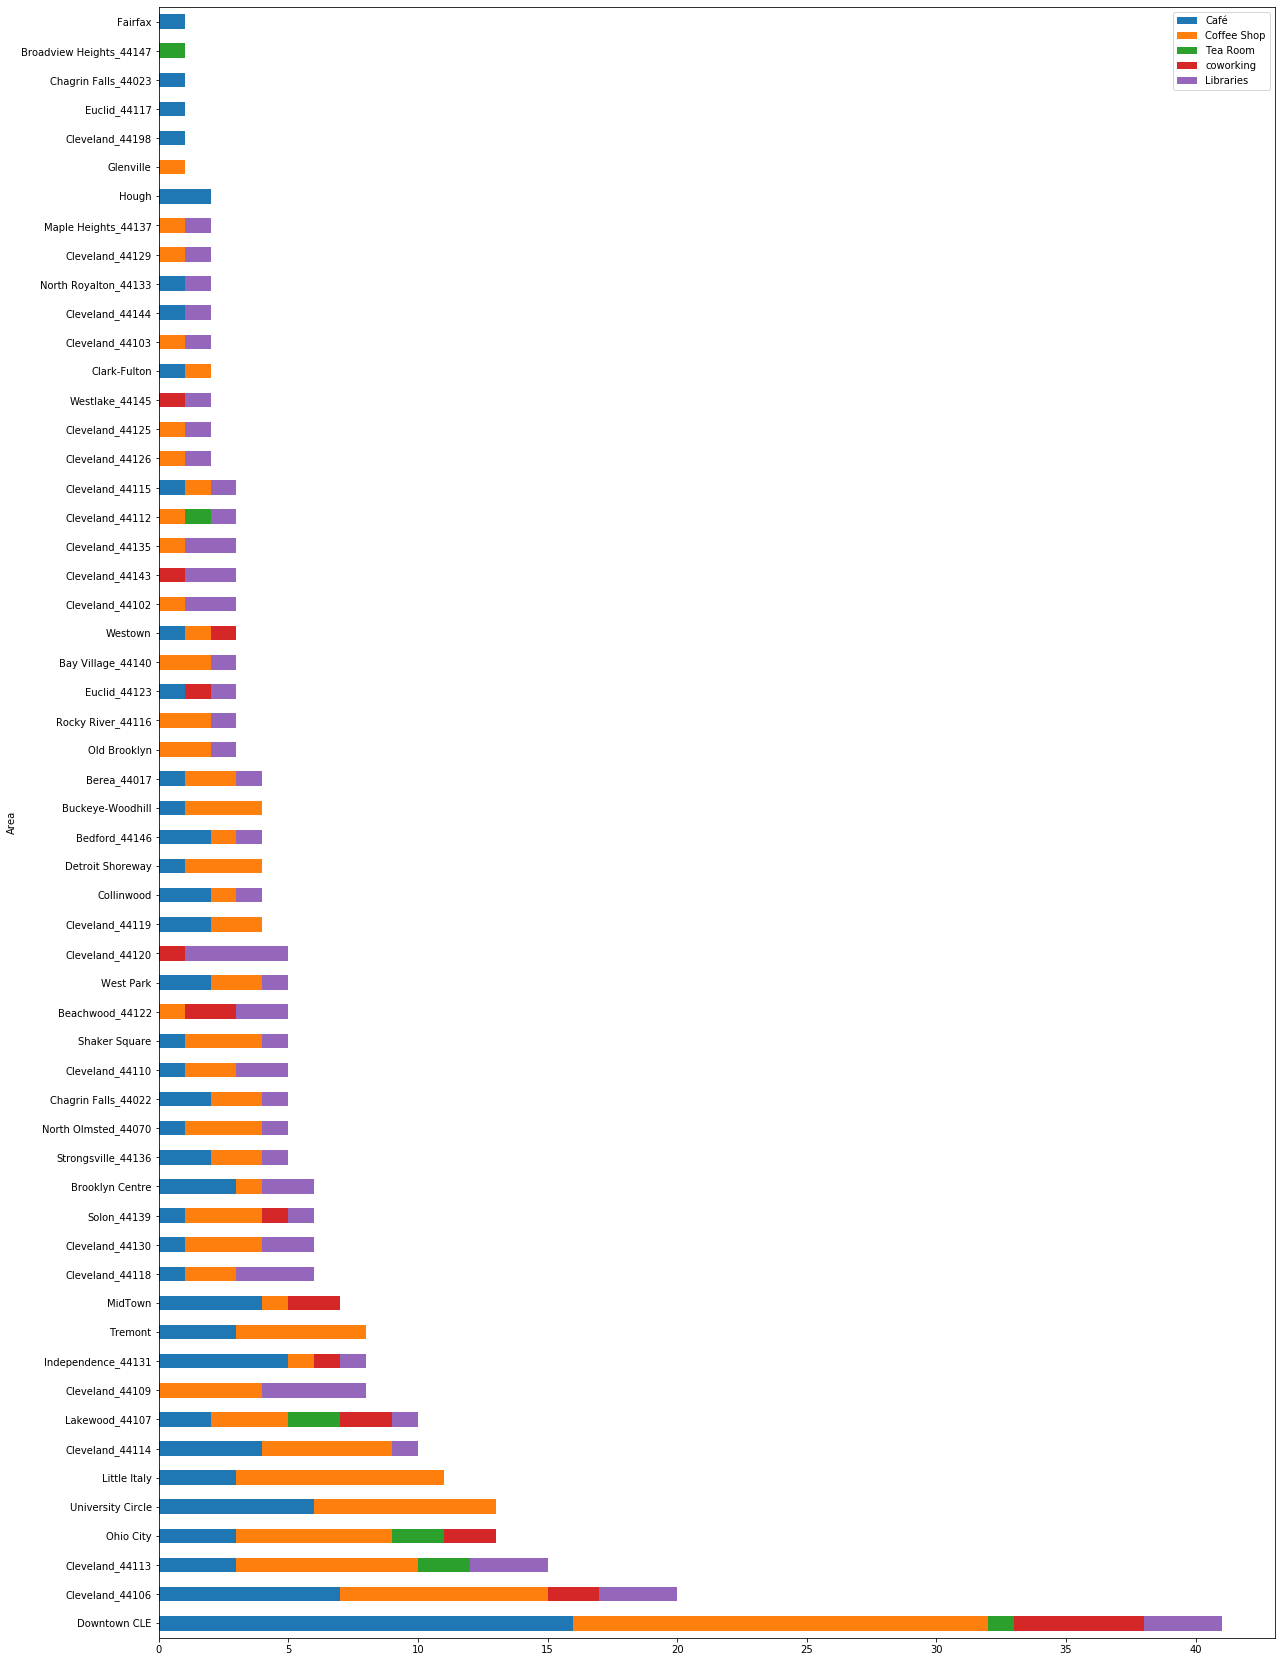

In [69]:
# Horizontal Bar Plots by neighborhood (area)
df.plot.barh(figsize=(20,30), stacked=True)


## Bar Graph Interpretation
Downtown Cleveland clearly has the most places for a freelancer to work, including all five of the options.  Cleveland_44106 has about half as many, followed closely by Cleveland_44113 (which overlaps Downtown Cleveland), University Circle, Ohio City, and Little Italy.

# K-Means Analysis of data
K-Means is a method for determining which neighborhoods are most similar to other neighborhoods.  We begin with a chosen number of clusters, K, which in this instance will be K=5.  


In [72]:
# Standardize the data based on the sum - data was ordered and standardized and saved as Cuyahoga_grouped1000_libStand.csv
df_std = pd.read_csv('Cuyahoga_grouped1000_libStand.csv')
df_std.head()


,Area,Café,Coffee Shop,Tea Room,coworking,Libraries
0,Downtown CLE,0.390244,0.390244,0.024390,0.121951,0.073171
1,Cleveland_44106,0.350000,0.400000,0.000000,0.100000,0.150000
2,Cleveland_44113,0.200000,0.466667,0.133333,0.000000,0.200000
3,Ohio City,0.230769,0.461538,0.153846,0.153846,0.000000
4,University Circle,0.461538,0.538462,0.000000,0.000000,0.000000


In [73]:
#beginning with 7 clusters - will check other numbers of clusters, the ideal number is at the 'elbow'
kclusters=7
df_cluster=df_std.drop('Area', 1)
kmeans=KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)
#check labels for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 6, 1, 1, 2, 3, 6, 3, 3, 2, 2, 1, 5, 1, 2, 5, 1, 1,
       1, 1, 3, 1, 6, 1, 3, 6, 2, 2, 2, 1, 2, 5, 3, 2, 2, 1, 1, 2, 2, 2,
       2, 3, 0, 2, 3, 5, 4, 0, 0, 0, 0, 6])

In [74]:
# add the cluster to the original sorted dataframe
#df_std.insert(0,'Cluster Labels',kmeans.labels_)
df_std.head()

,Area,Café,Coffee Shop,Tea Room,coworking,Libraries
0,Downtown CLE,0.390244,0.390244,0.024390,0.121951,0.073171
1,Cleveland_44106,0.350000,0.400000,0.000000,0.100000,0.150000
2,Cleveland_44113,0.200000,0.466667,0.133333,0.000000,0.200000
3,Ohio City,0.230769,0.461538,0.153846,0.153846,0.000000
4,University Circle,0.461538,0.538462,0.000000,0.000000,0.000000


In [75]:
# add the latitude and longitude for each area back in so we can map  
# We started with 73 areas, but 18 had no venues within 1000 m of the center of the neighborhood.
# first, let's save the data
df_std.to_csv('clustered_data1000.csv')
# added the latitude and longitude back into the data
df_std_latlng = pd.read_csv('clustered_data1000latlng.csv')
df_std_latlng.head()

,Unnamed: 0,Cluster Labels,Area,Café,Coffee Shop,Tea Room,coworking,Libraries,Latitude,Longitude
0,30,2,Bay Village_44140,0.00,0.666667,0.0,0.0,0.333333,41.484193,-81.92658
1,16,5,Beachwood_44122,0.00,0.200000,0.0,0.4,0.400000,41.472881,-81.52209
2,24,3,Bedford_44146,0.50,0.250000,0.0,0.0,0.250000,41.389371,-81.52709
3,25,1,Berea_44017,0.25,0.500000,0.0,0.0,0.250000,41.369950,-81.86259
4,50,4,Broadview Heights_44147,0.00,0.000000,1.0,0.0,0.000000,41.321827,-81.67659


In [76]:
#create map of clusters - copied from Toronto lab (week 3)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_std_latlng['Latitude'], df_std_latlng['Longitude'], df_std_latlng['Area'], df_std_latlng['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analysis of Clusters

In [77]:
# sort dataframe by clusters df.sort_values(by=['col1'])
df_std_latlng.sort_values(by=['Cluster Labels'], inplace=True)
df_std_latlng

,Unnamed: 0,Cluster Labels,Area,Café,Coffee Shop,Tea Room,coworking,Libraries,Latitude,Longitude
29,52,0,Cleveland_44198,1.000000,0.000000,0.000000,0.000000,0.000000,41.490000,-81.680000
33,53,0,Euclid_44117,1.000000,0.000000,0.000000,0.000000,0.000000,41.570344,-81.527260
35,54,0,Fairfax,1.000000,0.000000,0.000000,0.000000,0.000000,41.494738,-81.630273
37,46,0,Hough,1.000000,0.000000,0.000000,0.000000,0.000000,41.509827,-81.628017
8,51,0,Chagrin Falls_44023,1.000000,0.000000,0.000000,0.000000,0.000000,41.392171,-81.327480
20,27,1,Cleveland_44119,0.500000,0.500000,0.000000,0.000000,0.000000,41.586749,-81.545840
39,7,1,Lakewood_44107,0.200000,0.300000,0.200000,0.200000,0.100000,41.480881,-81.800360
18,33,1,Cleveland_44115,0.333333,0.333333,0.000000,0.000000,0.333333,41.493501,-81.671250
17,6,1,Cleveland_44114,0.400000,0.500000,0.000000,0.000000,0.100000,41.509880,-81.675300
16,2,1,Cleveland_44113,0.200000,0.466667,0.133333,0.000000,0.200000,41.484688,-81.701250


In [91]:
#save dataframe for printout
df_std_latlng.to_csv('stdlatlngcluster2.csv')

### Cluster 0 
There are 5 areas in this cluster.  All of them have Cafes only.

### Cluster 1
There are 18 areas in this cluster.  There is a mix of venues.

### Cluster 2
14 areas of mixed venues, all of which have a library, but no coworking spaces.

### Cluster 3
8 areas with mixed venues, but all contain both coffee shops and a library.

### Cluster 4
Consists of only 1 area.  Contains only a Tea Room.

### Cluster 5
Consists of 4 areas, all of which have both libraries and coworking spaces but no cafes.

### Cluster 6
5 areas containing only cafes and coffee houses.

# Conclusion - see full report

# Thank You!
Thanks to those at IBM who put together the Coursera Data Science Specialty.  Thank you to my graders and readers.  Good luck in your data science journey